In [1]:
import pandas as pd

In [2]:
data = {
    "Maturite": range(1,31),
    "Taux": [0.02736,0.02592,0.02593,0.0262,0.02642,0.02671,0.02699,0.02723,0.02744,0.02769,0.02788,0.02811,0.02828,0.02836,0.02835,0.02823,0.02806,0.02788,0.02771,0.02758,0.02750,0.02746,0.02745,0.02747,0.02750,0.02756,0.02762,0.02769,0.02778,0.02786]
}

df = pd.DataFrame(data)

# Afficher le DataFrame
print(df)

    Maturite     Taux
0          1  0.02736
1          2  0.02592
2          3  0.02593
3          4  0.02620
4          5  0.02642
5          6  0.02671
6          7  0.02699
7          8  0.02723
8          9  0.02744
9         10  0.02769
10        11  0.02788
11        12  0.02811
12        13  0.02828
13        14  0.02836
14        15  0.02835
15        16  0.02823
16        17  0.02806
17        18  0.02788
18        19  0.02771
19        20  0.02758
20        21  0.02750
21        22  0.02746
22        23  0.02745
23        24  0.02747
24        25  0.02750
25        26  0.02756
26        27  0.02762
27        28  0.02769
28        29  0.02778
29        30  0.02786


Text(0.5, 1.0, 'Courbe des taux')

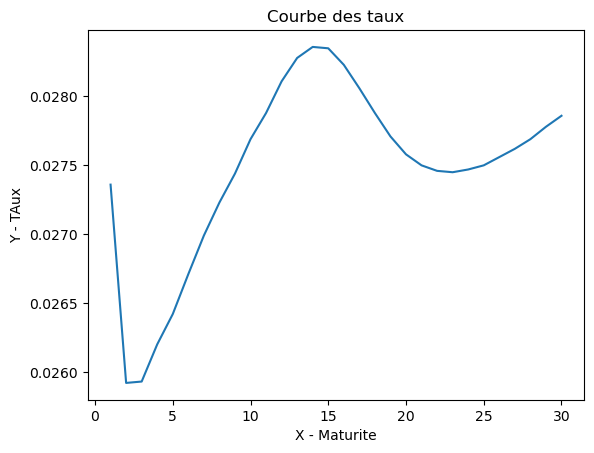

In [3]:
import matplotlib.pyplot as plt

# Tracer la courbe
plt.plot(df["Maturite"] , df["Taux"])

# Ajouter des titres
plt.xlabel("X - Maturite")
plt.ylabel("Y - TAux")
plt.title("Courbe des taux")

**Algorithme pseudo-inverse pour la volatilité implicite**


Etant donné qu'il est impossible d’inverser proprement la formule du swpation  formule pour isoler le sigma nous utilisons la méthode de Bissection. L'algortihme prend en entrées:

Prix observé de la swaption (
Prix
obs
Prix
obs
​
 ).

Montant notionnel (
N).

Taux forward du swap (
F).

Taux d'exercice (
K).

Temps jusqu'à l'expiration (
T).

Annuity Factor (
A).

Précision souhaitée (
ϵ) pour la convergence.

Sortie :
Volatilité implicite (
σ).


Pour le prix du swaption nous utilisons la formule de Black:

Prix=N⋅A⋅[K⋅N(−d
2
​
 )−F⋅N(−d
1
​
 )]

 Avec

$
 d_1 = \frac{\ln\left(\frac{F}{K}\right) + \frac{\sigma^2 T}{2}}{\sigma \sqrt{T}}
$

$
d_2 = d_1 - \sigma \sqrt{T}
$
 \[


In [4]:
import math
from scipy.stats import norm

#Calcul du prix du swaption avec la formule de Black
def black_swaption_price(N, F, K, T, A, sigma):

  d1 = (math.log(F / K) + 0.5 * sigma**2 * T) / (sigma * math.sqrt(T))
  d2 = d1 - sigma * math.sqrt(T)
  price = N * A * (K * norm.cdf(-d2) - F * norm.cdf(-d1))
  return price


Méthode de bissection


1. Choisir un intervalle initial $[\sigma_{\text{min}}, \sigma_{\text{max}}] $ où $ f(\sigma_{\text{min}}) \cdot f(\sigma_{\text{max}}) < 0 $.

2. Calculer $ \sigma_{\text{mid}} = \frac{\sigma_{\text{min}} + \sigma_{\text{max}}}{2}$.

3. Si $ f(\sigma_{\text{mid}}) \cdot f(\sigma_{\text{min}}) < 0$  remplacer  $\sigma_{\text{max}}$ par  $ \sigma_{\text{mid}} $.

4. Sinon, remplacer $ \sigma_{\text{min}}$ par $\sigma_{\text{mid}} $.

5. Répéter jusqu'à ce que $ |\sigma_{\text{max}} - \sigma_{\text{min}}| < \epsilon
$

In [5]:
# Fonction pour trouver la volatilité implicite par bissection
def find_implied_volatility(Prix_obs, N, F, K, T, A, tol=0.001, max_iter=1000):
    sigma_min = 0.001  # Volatilité minimale
    sigma_max = 1.0    # Volatilité maximale

    for i in range(max_iter):
        sigma_mid = (sigma_min + sigma_max) / 2
        price_mid = black_swaption_price(N, F, K, T, A, sigma_mid)

        if abs(price_mid - Prix_obs) < tol:
            return sigma_mid  # Convergence atteinte

        if price_mid < Prix_obs:
            sigma_min = sigma_mid
        else:
            sigma_max = sigma_mid

    raise ValueError("La volatilité implicite n'a pas convergé après {} itérations.".format(max_iter))

In [6]:
Prix_obs = 0.0236  # Prix observé de la swaption
N = 1  # Montant notionnel
F = 0.02089          # Taux forward du swap
K = 0.020896   # Taux d'exercice (2.2089%)
T = 1      # Temps jusqu'à l'expiration (1 an)
A= 9.01629985437


In [7]:
implied_vol = find_implied_volatility(Prix_obs, N, F, K, T, A)
print(f"La volatilité implicite est : {implied_vol * 100:.2f} %")

La volatilité implicite est : 31.32 %


Calcul des taux forward en utilisant la formule de VasiSec

drt = a (b − rt) dt + σdWt. En résolvant l'équation on obtient $ r_{t+dt}=r_{t}+ a(b-r_{t})\delta_{t} +\sigma dW_{t} $

In [26]:
import numpy as np
import matplotlib.pyplot as plt

a=1
b=0.02736
r0=np.mean(df["Taux"])*0.9
sigma=implied_vol

In [32]:
#Simulation du mouvement brownien

T,M,W0=30,600,0 #temps total, nb scenarios, pt initial
dt = 1/12 # Pas de temps en mois
N=int(T / dt) #Nombre d'étapes, de pas
timerange = np.linspace(0,T,N+1,endpoint=True)
#timerange=timerange[:,None]

In [34]:
#np.random.seed(42)
r = np.zeros((M, N+1))
r[:, 0] = r0
for s in range(M):
    for t in range(1, N):
        dW =np.sqrt(dt)*np.random.normal(0, 1) #Mouvement brownien
        r[s, t] = r[s, t-1] + a * (b - r[s, t-1]) * dt + sigma * dW

In [35]:
r

array([[ 0.0247266 ,  0.07806208,  0.09381721, ...,  0.33546013,
         0.41058884,  0.        ],
       [ 0.0247266 ,  0.14634346,  0.00684744, ...,  0.06989422,
         0.00407672,  0.        ],
       [ 0.0247266 ,  0.05884249,  0.02497916, ...,  0.00840611,
         0.0710486 ,  0.        ],
       ...,
       [ 0.0247266 ,  0.08472859,  0.15495492, ..., -0.0313937 ,
         0.01728796,  0.        ],
       [ 0.0247266 ,  0.01784885, -0.03621172, ...,  0.31704866,
         0.37858398,  0.        ],
       [ 0.0247266 , -0.04541506, -0.05852036, ...,  0.31189769,
         0.36637203,  0.        ]], shape=(600, 361))

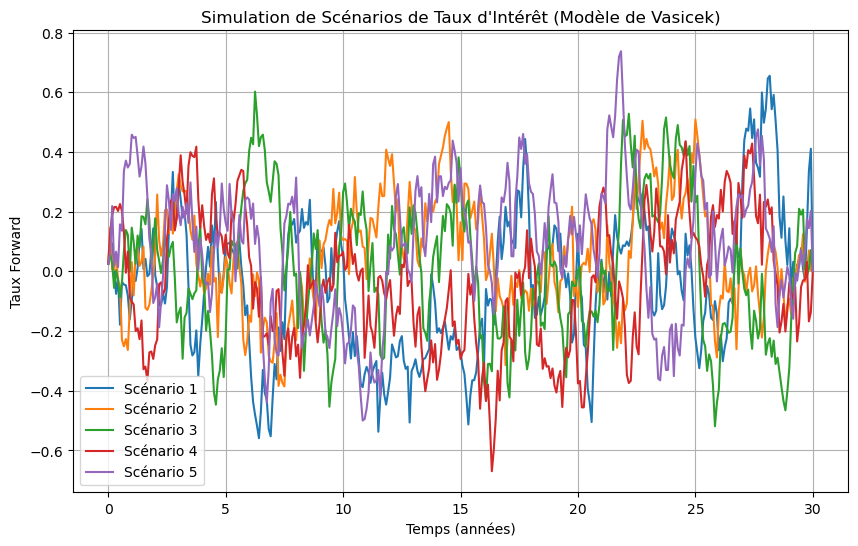

In [37]:
plt.figure(figsize=(10, 6))
for i in range(5):
    plt.plot(timerange, r[i], label=f"Scénario {i+1}")

plt.title("Simulation de Scénarios de Taux d'Intérêt (Modèle de Vasicek)")
plt.xlabel("Temps (années)")
plt.ylabel("Taux Forward")
plt.legend()
plt.grid(True)
plt.show()